## Unsupervised Models

In [2]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

#### Import data into pandas dataframe

In [3]:
df_wt = pd.read_csv(r'D:/VSCODE code/CIS550 Code/preprocessed_data.csv')
df_wt.head()

,Complaint,Class,Cleaned_Text,Unpunct_Text,Lowercase_Text,No_Stopwords,Tokenised_Text,Stemmed_Text,Lemmatized_Text
0,hello mailed dispute letter bureau remove one ...,credit_reporting,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,"['hello', 'mailed', 'dispute', 'letter', 'bure...","['hello', 'mailed', 'dispute', 'letter', 'bure...","['hello', 'mail', 'disput', 'letter', 'bureau'...","['hello', 'mail', 'disput', 'letter', 'bureau'..."
1,equifax violation following section equifax re...,credit_reporting,equifax violation following section equifax re...,equifax violation following section equifax re...,equifax violation following section equifax re...,"['equifax', 'violation', 'following', 'section...","['equifax', 'violation', 'following', 'section...","['equifax', 'violat', 'follow', 'section', 'eq...","['equifax', 'violat', 'follow', 'section', 'eq..."
2,deceptive offering promotional payment plan ma...,credit_card,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,"['deceptive', 'offering', 'promotional', 'paym...","['deceptive', 'offering', 'promotional', 'paym...","['decept', 'offer', 'promot', 'payment', 'plan...","['decept', 'offer', 'promot', 'payment', 'plan..."
3,whenever try connect pnc bank checking account...,retail_banking,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,"['whenever', 'try', 'connect', 'pnc', 'bank', ...","['whenever', 'try', 'connect', 'pnc', 'bank', ...","['whenev', 'tri', 'connect', 'pnc', 'bank', 'c...","['whenev', 'tri', 'connect', 'pnc', 'bank', 'c..."
4,account number concern presented yet handled r...,credit_reporting,account number concern presented yet handled r...,account number concern presented yet handled r...,account number concern presented yet handled r...,"['account', 'number', 'concern', 'presented', ...","['account', 'number', 'concern', 'presented', ...","['account', 'number', 'concern', 'present', 'y...","['account', 'number', 'concern', 'present', 'y..."


In [4]:
df_train = pd.read_csv('D:/VSCODE code/CIS550 code/AML_Project/data/training_data.csv')
df_train.head()

,Complaint,Class
0,hello mailed dispute letter bureau remove one ...,credit_reporting
1,equifax violation following section equifax re...,credit_reporting
2,deceptive offering promotional payment plan ma...,credit_card
3,whenever try connect pnc bank checking account...,retail_banking
4,account number concern presented yet handled r...,credit_reporting


In [5]:
#removing the NaN/NULL value
df_train.dropna(how='any',axis=0, inplace = True)

In [6]:
#defining funcction to clean dataset
def text_cleaning(text):
    text = [re.sub(r'@\S+', '', t) for t in text ]
    text = [re.sub(r'#', '', t) for t in text ]
    text = [re.sub(r"https?\S+", '', t) for t in text ]
    text = [re.sub(r"\d*", '', t) for t in text ]    
    text = [re.sub(r"[+|-|*|%]", '', t) for t in text ]  
    text = [re.sub(r"[^^(éèêùçà)\x20-\x7E]", '', t) for t in text]
    return text

In [7]:
df_train['Cleaned_Text'] = text_cleaning(df_train['Complaint'])

In [8]:
df_train.describe()

,Complaint,Class,Cleaned_Text
count,15835,15835,15835
unique,14184,5,14184
top,victim identity notified collection creditor s...,credit_reporting,victim identity notified collection creditor s...
freq,52,8889,52


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet') 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree
df_train['Unpunct_Text']= df_train['Cleaned_Text'].apply(lambda x:remove_punctuation(x))


In [11]:
#changing to lower case
df_train['Lowercase_Text']= df_train['Unpunct_Text'].apply(lambda x: x.lower())


In [12]:
#defining function for tokenization
def tokenization(text):
    tokens = sent_tokenize(text)
    return tokens
df_train['Tokenised_Text']=df_train['Lowercase_Text'].apply(lambda x: tokenization(x))


In [13]:
#defining the function to remove stopwords from tokenized text
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df_train['No_Stopwords'] = df_train['Tokenised_Text'].apply(lambda x: remove_stopwords(x))


In [14]:
# defining a function for stemming
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df_train['Stemmed_Text']=df_train['No_Stopwords'].apply(lambda x: stemming(x))


In [15]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df_train['Lemmatized_Text']=df_train['Stemmed_Text'].apply(lambda x:lemmatizer(x))

In [16]:
df_train.head()

,Complaint,Class,Cleaned_Text,Unpunct_Text,Lowercase_Text,Tokenised_Text,No_Stopwords,Stemmed_Text,Lemmatized_Text
0,hello mailed dispute letter bureau remove one ...,credit_reporting,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...
1,equifax violation following section equifax re...,credit_reporting,equifax violation following section equifax re...,equifax violation following section equifax re...,equifax violation following section equifax re...,[equifax violation following section equifax r...,[equifax violation following section equifax r...,[equifax violation following section equifax r...,[equifax violation following section equifax r...
2,deceptive offering promotional payment plan ma...,credit_card,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...
3,whenever try connect pnc bank checking account...,retail_banking,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...
4,account number concern presented yet handled r...,credit_reporting,account number concern presented yet handled r...,account number concern presented yet handled r...,account number concern presented yet handled r...,[account number concern presented yet handled ...,[account number concern presented yet handled ...,[account number concern presented yet handled ...,[account number concern presented yet handled ...


### KMeans Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [18]:
df2 = pd.DataFrame(data=df_train)
df2.head()

,Complaint,Class,Cleaned_Text,Unpunct_Text,Lowercase_Text,Tokenised_Text,No_Stopwords,Stemmed_Text,Lemmatized_Text
0,hello mailed dispute letter bureau remove one ...,credit_reporting,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...,[hello mailed dispute letter bureau remove one...
1,equifax violation following section equifax re...,credit_reporting,equifax violation following section equifax re...,equifax violation following section equifax re...,equifax violation following section equifax re...,[equifax violation following section equifax r...,[equifax violation following section equifax r...,[equifax violation following section equifax r...,[equifax violation following section equifax r...
2,deceptive offering promotional payment plan ma...,credit_card,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...,[deceptive offering promotional payment plan m...
3,whenever try connect pnc bank checking account...,retail_banking,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...,[whenever try connect pnc bank checking accoun...
4,account number concern presented yet handled r...,credit_reporting,account number concern presented yet handled r...,account number concern presented yet handled r...,account number concern presented yet handled r...,[account number concern presented yet handled ...,[account number concern presented yet handled ...,[account number concern presented yet handled ...,[account number concern presented yet handled ...


In [19]:
df_lemm = pd.DataFrame(data=df2['Lemmatized_Text'])
# Concatenate the lists into a single string
df_lemm['Lemmatized_Text_String'] = df_lemm['Lemmatized_Text'].apply(lambda x: ' '.join(x))
# Now 'Lemmatized_Text_String' contains the concatenated strings
print(df_lemm['Lemmatized_Text_String'])

0        hello mailed dispute letter bureau remove one ...
1        equifax violation following section equifax re...
2        deceptive offering promotional payment plan ma...
3        whenever try connect pnc bank checking account...
4        account number concern presented yet handled r...
                               ...                        
15830    issue credit bureau processing paperwork calle...
15831    sent letter collector received anything back d...
15832    add hard inquiry credit report per report incl...
15833    moneygram failed refund fraud induced money tr...
15834    every time get quote insurance either ineligib...
Name: Lemmatized_Text_String, Length: 15835, dtype: object


In [20]:
# Import necessary Libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

In [21]:
feature_column = 'Lemmatized_Text_String'
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_lemm[feature_column])

In [22]:
# Reduce dimensionality for visualization
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

In [23]:
# Perform K-Means clustering
num_clusters = 5  # You mentioned there are five classes
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X)

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_svd)

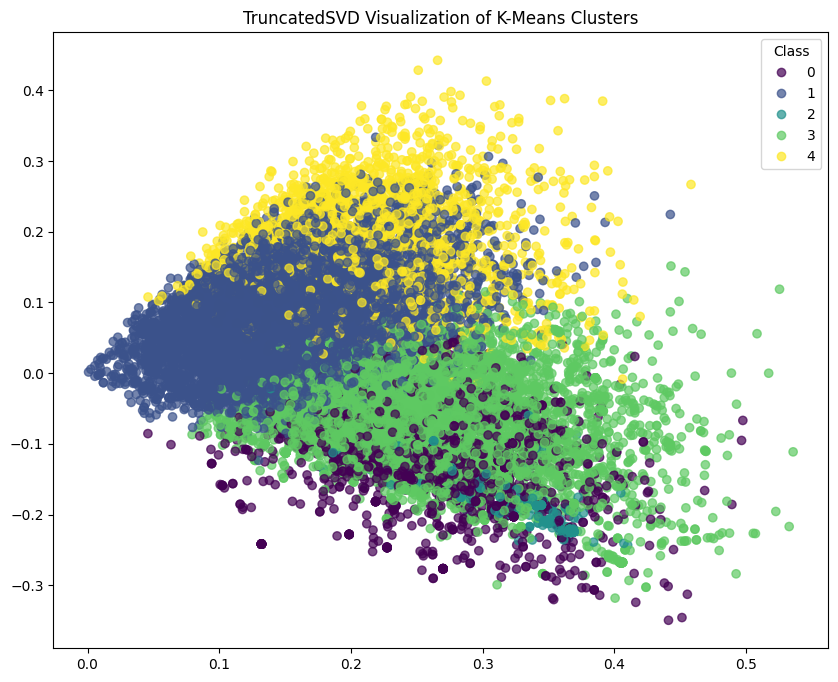

In [25]:
# Plot the clusters using the first two components from TruncatedSVD
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df2['Cluster'], cmap='viridis', alpha=0.7)
plt.title('TruncatedSVD Visualization of K-Means Clusters')
plt.legend(*scatter.legend_elements(), title='Class')
plt.show()

---

In [ ]:
# Group by 'Cluster' and count the occurrences of each class
cluster_class_distribution = df2.groupby(['Cluster', 'Class']).size().reset_index(name='Count')

# Display the distribution
print(cluster_class_distribution)

    Cluster                Class  Count
0         0          credit_card     14
1         0     credit_reporting   1535
2         0      debt_collection    117
3         0  mortgages_and_loans      6
4         0       retail_banking      2
5         1          credit_card   1200
6         1     credit_reporting   2075
7         1      debt_collection   1301
8         1  mortgages_and_loans   1194
9         1       retail_banking   1290
10        2     credit_reporting    376
11        2      debt_collection      1
12        3          credit_card     55
13        3     credit_reporting   4074
14        3      debt_collection    744
15        3  mortgages_and_loans     25
16        3       retail_banking      3
17        4          credit_card    249
18        4     credit_reporting    829
19        4      debt_collection     94
20        4  mortgages_and_loans    626
21        4       retail_banking     25


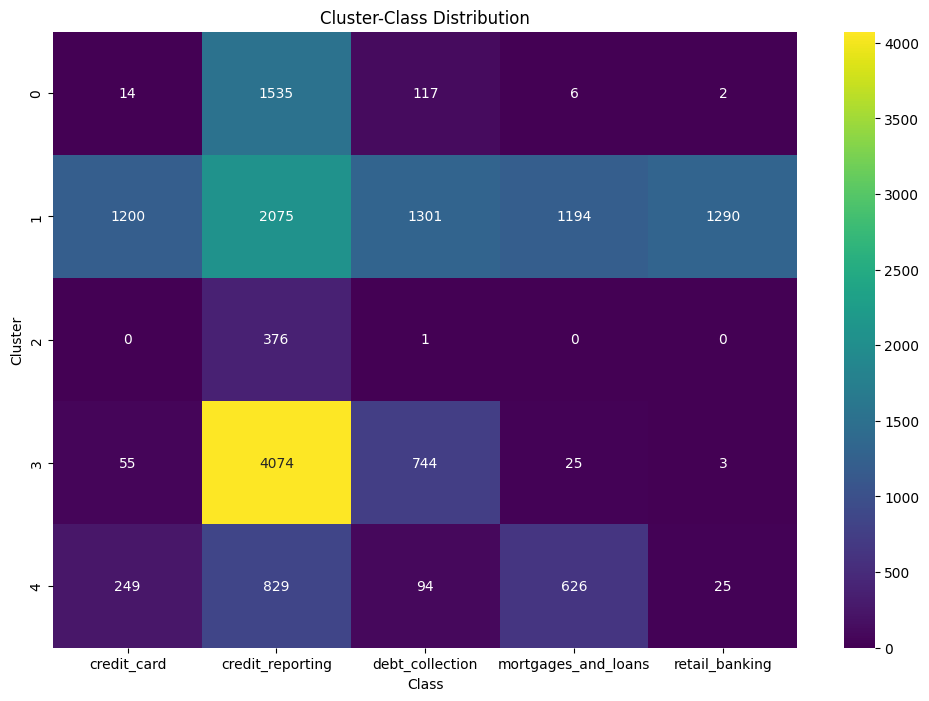

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for the heatmap
heatmap_data = cluster_class_distribution.pivot(index='Cluster', columns='Class', values='Count').fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis', cbar=True)
plt.title('Cluster-Class Distribution')
plt.show()

---

## Agglomerative Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
df4 = pd.DataFrame(data=df2['Lemmatized_Text'])
df4.head()

,Lemmatized_Text
0,[hello mailed dispute letter bureau remove one...
1,[equifax violation following section equifax r...
2,[deceptive offering promotional payment plan m...
3,[whenever try connect pnc bank checking accoun...
4,[account number concern presented yet handled ...


In [39]:
# Concatenate the lists into a single string
df4['Lemmatized_Text_String'] = df4['Lemmatized_Text'].apply(lambda x: ' '.join(x))
# Now 'Lemmatized_Text_String' contains the concatenated strings
print(df4['Lemmatized_Text_String'])

0        hello mailed dispute letter bureau remove one ...
1        equifax violation following section equifax re...
2        deceptive offering promotional payment plan ma...
3        whenever try connect pnc bank checking account...
4        account number concern presented yet handled r...
                               ...                        
15830    issue credit bureau processing paperwork calle...
15831    sent letter collector received anything back d...
15832    add hard inquiry credit report per report incl...
15833    moneygram failed refund fraud induced money tr...
15834    every time get quote insurance either ineligib...
Name: Lemmatized_Text_String, Length: 15835, dtype: object


In [40]:
# Assuming 'df' is your DataFrame with the lemmatized text strings column named 'Lemmatized_Text_String'
feature_column = 'Lemmatized_Text_String'

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X4 = vectorizer.fit_transform(df4[feature_column])
X4_dense = X4.toarray()

In [41]:
# Reduce dimensionality for visualization
svd = TruncatedSVD(n_components=2)
X_svd4 = svd.fit_transform(X4_dense)

In [42]:
# Perform hierarchical clustering
num_clusters = 5  # You can adjust this based on your preferences
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df4['Hierarchical_Cluster'] = agg_clustering.fit_predict(X4_dense)


c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


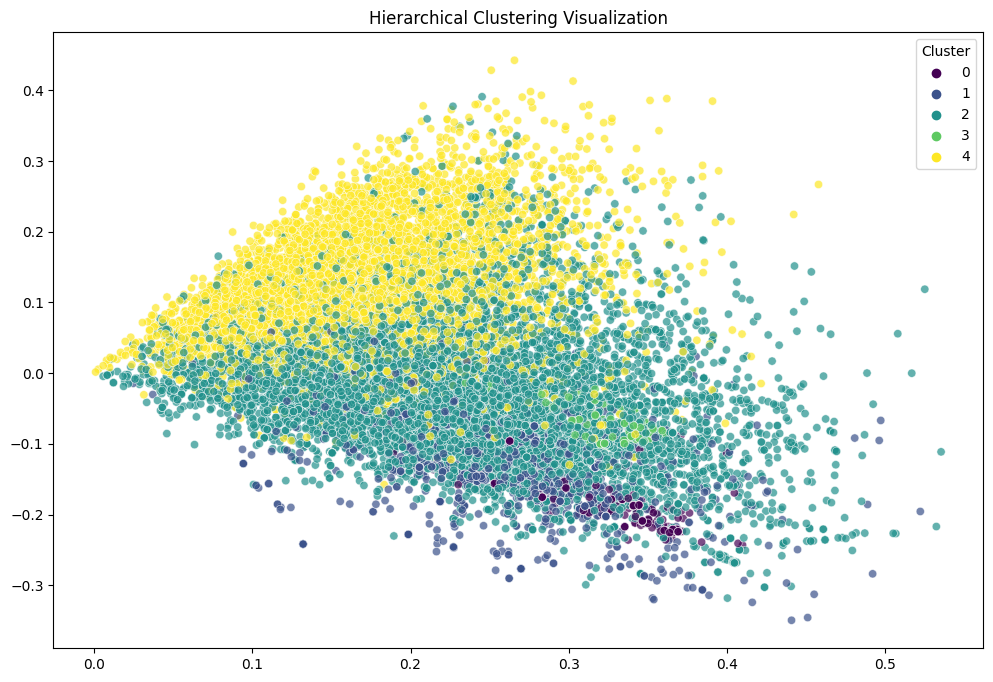

In [43]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=df4['Hierarchical_Cluster'], palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

---